In [1]:
import pandas as pd 
import numpy as np

## selection of any algorithm always depends on the y variable, if y variable is continuous we use the linear regression
## if the Y variable is not continuous you have to use categorical algorithms 


df = pd.read_csv(r"C:\Users\HP\Desktop\dataset\headbrain.csv")
df.head()

,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590


In [2]:
### https://towardsdatascience.com/top-3-methods-for-handling-skewed-data-1334e0debf4

## check the data 

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237 entries, 0 to 236
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Gender               237 non-null    int64
 1   Age Range            237 non-null    int64
 2   Head Size(cm^3)      237 non-null    int64
 3   Brain Weight(grams)  237 non-null    int64
dtypes: int64(4)
memory usage: 7.5 KB
None


In [3]:
## used to view some basic statistical details like percentile, mean, std etc. of a data frame or a series of numeric values.
df.describe()

,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
count,237.000000,237.000000,237.000000,237.000000
mean,1.434599,1.535865,3633.991561,1282.873418
std,0.496753,0.499768,365.261422,120.340446
min,1.000000,1.000000,2720.000000,955.000000
25%,1.000000,1.000000,3389.000000,1207.000000
50%,1.000000,2.000000,3614.000000,1280.000000
75%,2.000000,2.000000,3876.000000,1350.000000
max,2.000000,2.000000,4747.000000,1635.000000


In [4]:
## Find the null value in the data set 

print(" NaN value in the data set column wise :- \n " , df.isnull().sum())
print(" Total NaN value in the data set  :- \n " , df.isnull().sum().sum())


 NaN value in the data set column wise :- 
  Gender                 0
Age Range              0
Head Size(cm^3)        0
Brain Weight(grams)    0
dtype: int64
 Total NaN value in the data set  :- 
  0


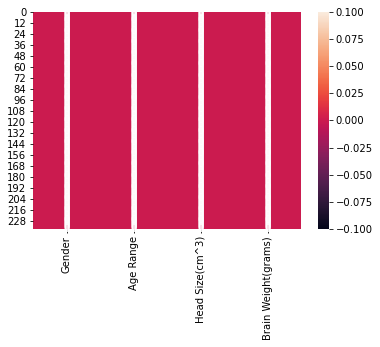

In [6]:
## check visualization of the null value using the seaborn library

import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(df.isnull(),annot=True)
plt.show()


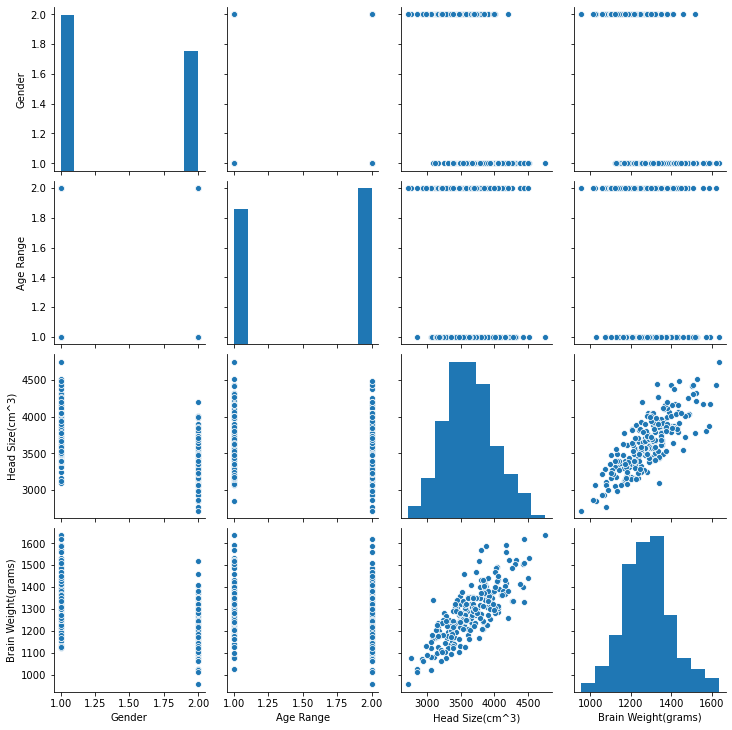

In [8]:
sns.pairplot(data=df)
plt.show()

In [9]:
## let's check whether there are outliers present or not 

from scipy.stats import zscore
z = abs(zscore(df))
print(df.shape)
df_final = df.loc[(z<3).all(axis = 1)]
print(df_final.shape)


(237, 4)
(236, 4)


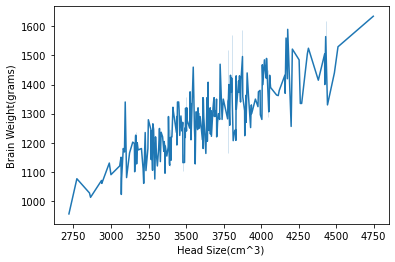

In [10]:
## lest check that relation between Brain Weight(grams) and Head Size(cm^3)

sns.lineplot(x=df["Head Size(cm^3)"] , y=df["Brain Weight(grams)"], data= df)
plt.show()

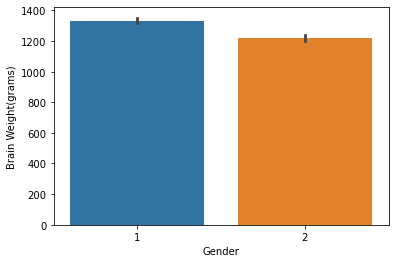

In [11]:
## lets check the what is the average size according to gender

sns.barplot(y=df["Brain Weight(grams)"], x=df["Gender"], data=df)
plt.show()

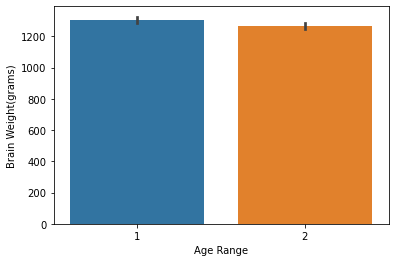

In [9]:
## lets check the what is the average size according to age
sns.barplot(y=df["Brain Weight(grams)"], x=df["Age Range"], data=df)
plt.show()

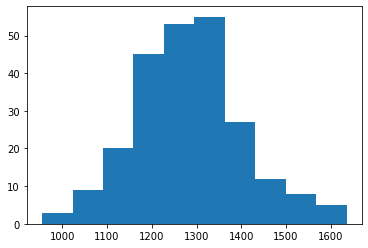

In [12]:
## #Lets draw histogram for brain weight
plt.hist(x= "Brain Weight(grams)" , data = df )
plt.show()

#we can say it shows almost normal distribution based on below output

In [13]:
#lets hcek skewnesss of the dataset
df.skew()
#Below shows acceptable level of skewness (-.55 to +.55 )

Gender                 0.265554
Age Range             -0.144748
Head Size(cm^3)        0.238807
Brain Weight(grams)    0.265478
dtype: float64

In [14]:
#Now let seprate input and output variable to be used for the linear regression problem
x=df[["Head Size(cm^3)"]]
y=df[["Brain Weight(grams)"]]

print(x.head())
print(y.head())



   Head Size(cm^3)
0             4512
1             3738
2             4261
3             3777
4             4177
   Brain Weight(grams)
0                 1530
1                 1297
2                 1335
3                 1282
4                 1590


In [15]:
## #scaling down using standardscaler
from sklearn.preprocessing import StandardScaler
sc = StandardScaler() ###Perform standardization by centering and scaling
x = sc.fit_transform(x)
print(x)

[[ 2.40886829]
 [ 0.28535333]
 [ 1.72023489]
 [ 0.39235214]
 [ 1.4897759 ]
 [-0.13441126]
 [ 0.41430062]
 [-0.2057438 ]
 [-0.05759159]
 [ 0.95478182]
 [-0.52399669]
 [ 0.98496097]
 [ 0.01648451]
 [ 1.57482624]
 [ 0.54324791]
 [ 0.66396452]
 [-0.37584448]
 [-0.46089482]
 [-1.47875536]
 [ 2.16743507]
 [ 0.66945164]
 [ 1.13036962]
 [ 0.46642825]
 [ 0.20853367]
 [ 3.05360475]
 [ 2.16469151]
 [ 1.10293403]
 [ 1.06452419]
 [-0.49381754]
 [ 1.48428878]
 [ 0.41978774]
 [ 0.44447977]
 [ 1.28675251]
 [ 1.44587895]
 [ 1.43764827]
 [ 0.49386384]
 [-0.2935377 ]
 [ 0.31278892]
 [-0.82304466]
 [-0.38956228]
 [ 0.89991063]
 [-0.35389601]
 [ 1.8683871 ]
 [ 0.46642825]
 [ 0.62829825]
 [ 1.09744691]
 [ 1.84918218]
 [-1.2867062 ]
 [ 0.01922807]
 [ 0.02745875]
 [ 0.70511792]
 [ 0.4362491 ]
 [ 1.74492692]
 [ 1.17701013]
 [ 1.0370886 ]
 [-0.4828433 ]
 [ 0.70237436]
 [ 1.45959675]
 [ 0.82583453]
 [ 0.09604773]
 [ 0.63652893]
 [-0.66117466]
 [ 2.21681914]
 [ 1.69828641]
 [ 0.25517418]
 [-0.83676246]
 [-0.60081

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import linear_model
max_r_score = 0
for r_state in range (0 , 101):
    x_train,x_test,y_train,y_test = train_test_split(x , y , random_state = r_state , test_size = 0.20 ) ## split the data set 
    regr = linear_model.LinearRegression() #  use the regression model 
    regr.fit(x_train,y_train) # train and test data set fit in the model 
    y_pred = regr.predict(x_test)
    r2_scr = r2_score(y_test,y_pred)
    print("r2_score corresponding to random state: ",r_state," is: ",r2_scr)
    if r2_scr>max_r_score:
        max_r_score=r2_scr
        final_r_state=r_state
print()
print()
print("max r2 score corresponding to ",final_r_state," is ",max_r_score)
#The belwo output shows that we are getting acceptable level of r2 score in most of the cases and max value is also shown

r2_score corresponding to random state:  0  is:  0.6376364238008984
r2_score corresponding to random state:  1  is:  0.5571552826824455
r2_score corresponding to random state:  2  is:  0.6793647592908127
r2_score corresponding to random state:  3  is:  0.7600797473316105
r2_score corresponding to random state:  4  is:  0.6537136105372976
r2_score corresponding to random state:  5  is:  0.7548417934153979
r2_score corresponding to random state:  6  is:  0.6203314269202966
r2_score corresponding to random state:  7  is:  0.6700896298559369
r2_score corresponding to random state:  8  is:  0.6351181790533427
r2_score corresponding to random state:  9  is:  0.665534730434928
r2_score corresponding to random state:  10  is:  0.832745812102125
r2_score corresponding to random state:  11  is:  0.4568031562935818
r2_score corresponding to random state:  12  is:  0.6424800194863828
r2_score corresponding to random state:  13  is:  0.6327692971965183
r2_score corresponding to random state:  14  i

In [17]:
#Lets do the cross validation
from sklearn.model_selection import cross_val_score
cross_val_score(linear_model.LinearRegression(), x, y, cv=5,scoring="r2").mean()
#the Below cross validation score is less and it shows that we further need to improve our model using more data

0.4936984443261272

In [18]:

#since maximum is comming around random state 10  will use that to create our final model
x_train, x_test, y_train, y_test = train_test_split(x, y,random_state =10,test_size=0.20)
lr=linear_model.LinearRegression()
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)

In [ ]:
sns.scatterplot(x=y_test , y=y_pred )

In [19]:
#Lets evaluate RMSE and r2 score using sklearn library
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import numpy as np
print("r2 score is: ",r2_score(y_test,y_pred))
print("RMSE is : ",np.sqrt(mean_squared_error(y_test,y_pred)))


r2 score is:  0.832745812102125
RMSE is :  54.3187676163564


In [3]:

from sklearn.metrics import confusion_matrix #for confusion matrix
from sklearn.model_selection import cross_val_predict


NameError: name 'logreg' is not defined